# PeGaSOS Implementation




In [151]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [152]:
X, Y = make_classification(n_classes = 2, n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

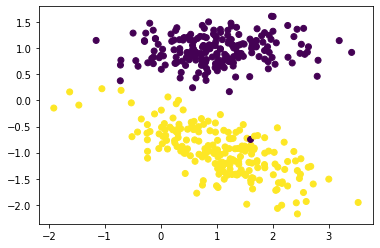

In [153]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [154]:
#Normalize the dataset
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [185]:
class SVM:
    
    def __init__(self, C= 10.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            loss += self.C*max(0, (1-ti))
            
        return loss[0][0]
    
    
    def fit(self,X,Y,batch_size=100,lr=1e-3, maxItr = 300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = lr
        c = self.C
        
        W = np.zeros((1, no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        
        losses = []
        
        for i in range(maxItr):
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Grdaient Descent with Random Shuffling
            for bs in range(0,no_of_samples,batch_size):
                
                gradw = 0
                gradb = 0
                
                for j in range(bs, bs+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T) + bias)
                        
                        if ti > 1:
                            gradw = 0
                            gradb = 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
               
                W = W - n*W +  n*gradw
                bias = bias + n*gradb
                    
        self.W = W
        self.b = bias
        return W, bias, losses
            
            
            
        
        

In [193]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y, maxItr=1000)
print(losses)

4000.0
[4000.0, 733.0015483769355, 666.97753831523, 667.375170737073, 660.1166329770004, 631.7979400285278, 593.1735243035341, 597.6874926093378, 568.592516883876, 536.331695483141, 530.1264474765285, 523.360407502245, 509.4521474676763, 530.5671015675105, 502.0846301907392, 481.59376370633163, 476.1673961567104, 486.3307182069548, 490.35259127712646, 468.3132134992943, 461.38587400505736, 464.9925898553879, 458.9910323896845, 447.6297698491708, 410.18769951580845, 405.9948836827657, 400.5791130103723, 403.4643998255687, 406.3381887849782, 406.29157205113336, 385.0859907695402, 380.71031672106443, 370.7659817254903, 366.5282647071787, 368.7328680940816, 364.2070963307603, 367.31257530003023, 351.89202351411143, 350.62427383717323, 350.6978678539211, 350.43597259055434, 353.653107607108, 356.1111556741317, 348.9282595722226, 349.9417754295427, 349.6138850151286, 345.45520730143835, 339.4010572464992, 339.68114862554904, 325.69622097396405, 328.52922995834086, 329.1477200977376, 321.4017

In [194]:
losseW,B = mySVM.W, mySVM.b
print(W,B)

[[-0.19917039 -1.50759474]] 0.22999999999999987


In [195]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    
    
    x_p = -(w1*x_1+b+1)/w2
    x_n = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2,label='Hyperplane')
    plt.plot(x_1,x_p, label= 'Positive Hyperplane')
    plt.plot(x_1,x_n,label = 'Negative Hyperplane')
    plt.legend()
    
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

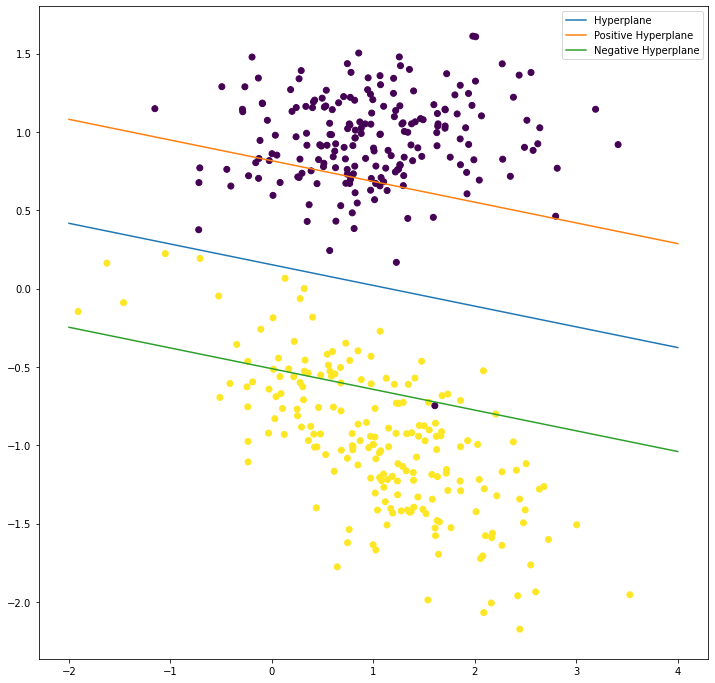

In [196]:
plotHyperplane(W[0,0], W[0,1],b)

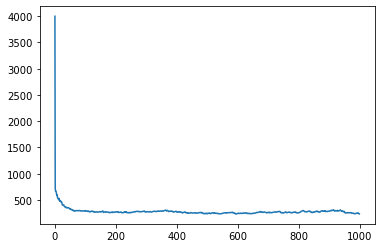

In [197]:
plt.plot(losses)
plt.show()